In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Dataset\train_titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# family joh hai voh siblingspouse aur parent child mil ke bna hai
df['Family'] = pd.concat([df['SibSp']+df['Parch']],axis=1)

In [6]:
df = df[['Age','Fare','Family','Survived']]
# we are only taking the these 4 columns to used as we know age having miising values

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [11]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.2 )

In [102]:
x_train.shape

(712, 3)

In [103]:
x_test.shape

(179, 3)

In [104]:
x_train.isnull().mean()*100

Age       20.786517
Fare       0.000000
Family     0.000000
dtype: float64

In [105]:
# meadian _age & mean of age
mean_age = x_train['Age'].mean()
print(mean_age)
meadian_age = x_train['Age'].median()
print(meadian_age)


29.78590425531915
28.75


In [106]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median']   = x_train['Age'].fillna(meadian_age)

In [107]:
x_train

,Age,Fare,Family,age_mean,age_median
30,40.0,27.7208,0,40.000000,40.00
10,4.0,16.7000,2,4.000000,4.00
873,47.0,9.0000,0,47.000000,47.00
182,9.0,31.3875,6,9.000000,9.00
876,20.0,9.8458,0,20.000000,20.00
...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00
584,NaN,8.7125,0,29.785904,28.75
493,71.0,49.5042,0,71.000000,71.00
527,NaN,221.7792,0,29.785904,28.75


# lets check the variance

In [108]:

print('Original age variable variance',x_train['Age'].var())
print('age variance after meadian imputation',x_train['age_median'].var())
print('age variance after mean imputation',x_train['age_mean'].var())

Original age variable variance 204.3495133904614
age variance after meadian imputation 161.9895663346054
age variance after mean imputation 161.81262452718673


# observation:- age me 20 % missing values that why bada change aya usme

# hme kya notice krna chahiye 
* variance drastically change na ho
* distribution me kaisa change aya 
* covariance and correlation check krna chahiye


# PDF

In [109]:
import matplotlib.pyplot as plt

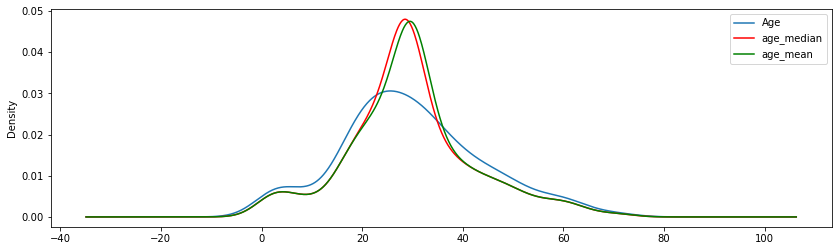

In [110]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)

# original distribution
x_train['Age'].plot(kind = 'kde',ax=ax)

# with meadian
x_train['age_median'].plot(kind= 'kde',ax=ax,color = 'red')
# with mean
x_train['age_mean'].plot(kind='kde',ax=ax,color = 'green')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



# lets check covariance

In [41]:
x_train.cov()

,Age,Fare,Family,age_median,age_mean
Age,204.349513,71.512440,-6.498901,204.349513,204.349513
Fare,71.512440,2368.246832,16.847264,58.986531,56.626587
Family,-6.498901,16.847264,2.735252,-5.112563,-5.146106
age_median,204.349513,58.986531,-5.112563,161.989566,161.812625
age_mean,204.349513,56.626587,-5.146106,161.812625,161.812625


# lets check correlation

In [42]:
x_train.corr()

,Age,Fare,Family,age_median,age_mean
Age,1.000000,0.095814,-0.299113,1.000000,1.000000
Fare,0.095814,1.000000,0.209323,0.095235,0.091475
Family,-0.299113,0.209323,1.000000,-0.242883,-0.244610
age_median,1.000000,0.095235,-0.242883,1.000000,0.999454
age_mean,1.000000,0.091475,-0.244610,0.999454,1.000000


# lets plot the boxplot to check the outliers

<AxesSubplot:>

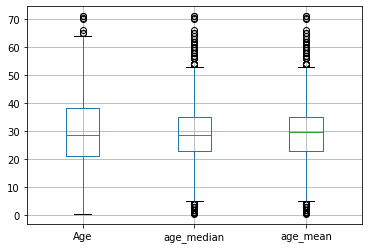

In [44]:
x_train[['Age','age_median','age_mean']].boxplot()

# lest use sklearn

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.2)

In [85]:
x_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [86]:
x_test

,Age,Fare,Family
707,42.0,26.2875,0
37,21.0,8.0500,0
615,24.0,65.0000,3
169,28.0,56.4958,0
68,17.0,7.9250,6
...,...,...,...
89,24.0,8.0500,0
80,22.0,9.0000,0
846,NaN,69.5500,10
870,26.0,7.8958,0


In [87]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [88]:
trf = ColumnTransformer([
    ('impute1',imputer1,['Age'])
],remainder = 'passthrough')

In [93]:
trf2 = ColumnTransformer([
    ('impute2',imputer2,['Age'])
],remainder = 'passthrough')

In [89]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [94]:
trf2.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute2', SimpleImputer(), ['Age'])])

In [90]:
# median imputation
trf.named_transformers_['impute1'].statistics_

array([28.75])

In [95]:

#mean imputation
trf2.named_transformers_['impute2'].statistics_

array([29.78590426])

In [91]:
 trf.transform(x_train)


array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [92]:
trf.transform(x_test)

array([[ 42.    ,  26.2875,   0.    ],
       [ 21.    ,   8.05  ,   0.    ],
       [ 24.    ,  65.    ,   3.    ],
       [ 28.    ,  56.4958,   0.    ],
       [ 17.    ,   7.925 ,   6.    ],
       [ 30.    ,   7.8958,   0.    ],
       [ 80.    ,  30.    ,   0.    ],
       [ 25.    ,   7.25  ,   0.    ],
       [ 50.    , 133.65  ,   2.    ],
       [ 25.    ,  26.    ,   1.    ],
       [ 35.    ,  26.    ,   0.    ],
       [ 35.    ,  90.    ,   1.    ],
       [ 55.    ,  16.    ,   0.    ],
       [ 28.75  ,  56.4958,   0.    ],
       [ 28.75  ,  56.4958,   0.    ],
       [ 19.    ,   7.8542,   1.    ],
       [ 28.75  ,  15.2458,   2.    ],
       [ 49.    ,   0.    ,   0.    ],
       [ 18.    ,  14.4542,   1.    ],
       [ 65.    ,   7.75  ,   0.    ],
       [ 18.    , 108.9   ,   1.    ],
       [ 28.75  ,  22.3583,   2.    ],
       [ 16.    ,  18.    ,   2.    ],
       [ 21.    ,   9.825 ,   1.    ],
       [ 19.    ,   6.75  ,   0.    ],
       [  1.    ,  11.133

In [96]:
trf2.transform(x_test)

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 29.78590426,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  14.4542    ,   1.        ],
       [ 65.        ,   7.75   

In [97]:
trf2.transform(x_train)

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])